In [1]:
# Fine tuning with Pretrained network

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [3]:
base_dir = r'c:\Download\catsdogs\cats_and_dogs_small'

In [4]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [6]:
# Test data should not be Augmented

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [9]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [10]:
# Instantiating the VGG16 convolutional base

In [11]:
from tensorflow.keras.applications import VGG16

In [12]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [13]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [14]:
# fine-tune the last three convolutional layers, which means all layers up to
# block4_pool should be frozen, and the layers block5_conv1, block5_conv2, and
# block5_conv3 should be trainable

In [15]:
# Freezing all layers up to a specific one

In [16]:
conv_base.trainable = True

In [17]:
set_trainable = False

In [18]:
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False

In [ ]:
# Adding a densely connected classifier on top of the convolutional base

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [22]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
# Fine-tuning the model

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

In [25]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - 80s 798ms/step - loss: 0.4620 - accuracy: 0.7780 - val_loss: 0.2090 - val_accuracy: 0.9210
Epoch 2/100
100/100 [==============================] - 41s 409ms/step - loss: 0.2753 - accuracy: 0.8865 - val_loss: 0.1770 - val_accuracy: 0.9270
Epoch 3/100
100/100 [==============================] - 41s 410ms/step - loss: 0.2224 - accuracy: 0.9040 - val_loss: 0.1378 - val_accuracy: 0.9410
Epoch 4/100
100/100 [==============================] - 41s 411ms/step - loss: 0.1936 - accuracy: 0.9250 - val_loss: 0.1111 - val_accuracy: 0.9540
Epoch 5/100
100/100 [==============================] - 41s 411ms/step - loss: 0.1693 - accuracy: 0.9255 - val_loss: 0.1149 - val_accuracy: 0.9570
Epoch 6/100
100/100 [==============================] - 41s 411ms/step - loss: 0.1587 - accuracy: 0.9325 - val_loss: 0.0962 - val_accuracy: 0.9640
Epoch 7/100
100/100 [===========================

100/100 [==============================] - 33s 326ms/step - loss: 0.0075 - accuracy: 0.9960 - val_loss: 0.2093 - val_accuracy: 0.9650
Epoch 54/100
100/100 [==============================] - 33s 326ms/step - loss: 0.0199 - accuracy: 0.9935 - val_loss: 0.1824 - val_accuracy: 0.9670
Epoch 55/100
100/100 [==============================] - 33s 326ms/step - loss: 0.0211 - accuracy: 0.9920 - val_loss: 0.1390 - val_accuracy: 0.9690
Epoch 56/100
100/100 [==============================] - 33s 326ms/step - loss: 0.0144 - accuracy: 0.9925 - val_loss: 0.1617 - val_accuracy: 0.9720
Epoch 57/100
100/100 [==============================] - 33s 326ms/step - loss: 0.0131 - accuracy: 0.9945 - val_loss: 0.1568 - val_accuracy: 0.9740
Epoch 58/100
100/100 [==============================] - 33s 326ms/step - loss: 0.0209 - accuracy: 0.9945 - val_loss: 0.1577 - val_accuracy: 0.9690
Epoch 59/100
100/100 [==============================] - 33s 326ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.2349 - val_a

In [ ]:
# Plotting the results

In [26]:
import matplotlib.pyplot as plt

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [28]:
epochs = range(1, len(acc) + 1)

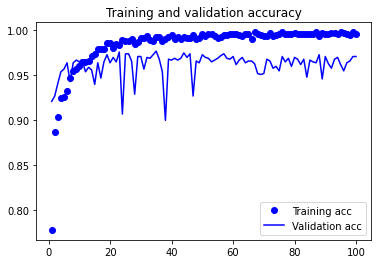

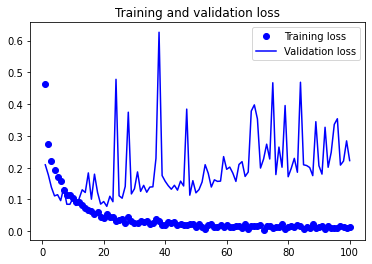

In [29]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# finally evaluate this model on the test data

In [30]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

Found 1000 images belonging to 2 classes.


In [31]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

Instructions for updating:
Please use Model.evaluate, which supports generators.


In [32]:
print('test acc:', test_acc)

test acc: 0.9610000252723694


In [34]:
print(round(test_acc,2)*100)

96.0
